# Data Analysis

of Project 'Demography behind household sizes in Switzerland and its change in time'

**Project:** Switzerland has a high population density, due to its relatively small size and several inhabitable areas. Therefore, the distribution of the people on the available accommodations is crucial and will be investigated in this project. Shared households are very common in low-income societies, such as student-accommodations. How the effective household sizes are connected to the demographical informations and also the political opinion of regions will be investigated in the following.

## Datasets

* **hh_sizes:** Distribution of Population in 1-6 person households for 2011 - 2017 || Municipality Level
* **cantonal_parties:** Voter's shares of the political parties in Switzerland for 2007 - 2018 || Cantonal Level
* **demographics_population:** Demographic information (incl. foreigners, age) for 2010 - 2017 || Cantonal Level
* **wage_swiss_foreign:** Mean Income with quantiles and work types for 2008 - 2016 || Regional Level
* **incomes:** Mean Incomes with age-distribution for the year 2007 || Municipality Level
* **rental_13_16:** Rental averages for 2013 - 2016 || Regional Level
* **rental_foreign:** Distribution of rents for 2012 - 2016 || Regional Level
* **rental_sqm_demographics:** Living conditions (demographically) in percents  for 2011 - 2016 || Regional Level

In [1]:
%matplotlib inline
import os
import pandas as pd
import json
import folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_folder = './data/wrangled_data/'

In [31]:
# the cleaned and wrangled data from the notebook "Data Wrangling" is imported and numerous arrays are created
array_names = []

for i in os.listdir(data_folder):
    globals()['%s' %i[:-4]] = pd.read_csv(data_folder + str(i))
    array_names.append(i[:-4])
    
#contains the list of all availble arrays
pd.DataFrame(array_names, columns=['Array Name']).sort_values(['Array Name'])

,Array Name
6,demographics2010
14,demographics2011
36,demographics2012
29,demographics2013
7,demographics2014
33,demographics2015
38,demographics2016
34,demographics2017
9,elections2007-2010
4,elections2008-2011


In [191]:
#plot the distribution of the 6 household types over the last seven years

household_types = ['1-person households', '2-person households', '3-person households', '4-person households', 
                   '5-person households', '6-person or larger households']

# 2010 and 2011 have to be treated specially, as the sums are not calculated in the input sheet
sum2010 = []
sum2011 = []

for hh in household_types:
    sum2010.append(hh_sizes2010[hh][1:].replace('()', 0).fillna(0).astype(float).sum())
    sum2011.append(hh_sizes2011[hh][1:].replace('()', 0).fillna(0).astype(float).sum())

# we can create an evolution file for the comparison of the 
hh_sizes_evolution = pd.DataFrame(sum2010, columns=['2010'])
hh_sizes_evolution['2011'] = sum2011
for i in range(2012,2018):
    hh_sizes_evolution[str(i)] = globals()['hh_sizes%s' %i].iloc[0][household_types]


In [193]:
hh_sizes_evolution

,2010,2011,2012,2013,2014,2015,2016,2017
0,1855321.0,1645535.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3491182.0,3198320.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2097588.0,1982055.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2802832.0,2636940.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1260020.0,1175850.0,NaN,NaN,NaN,NaN,NaN,NaN
5,659529.0,613125.0,NaN,NaN,NaN,NaN,NaN,NaN


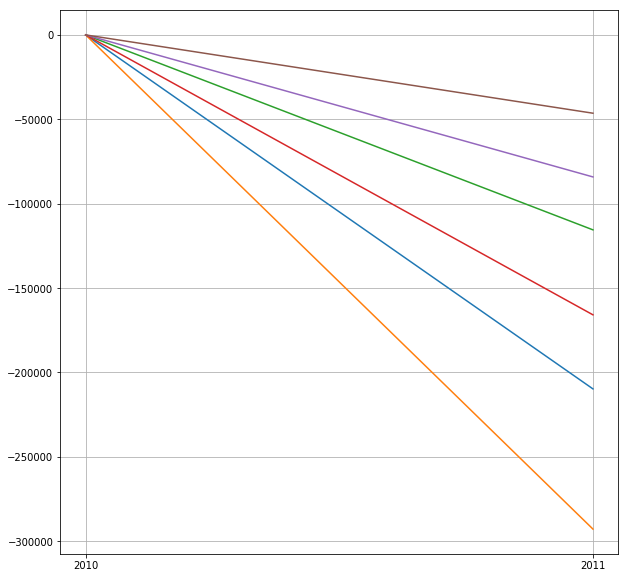

In [192]:
plt.figure(figsize=(10, 10))
plt.plot(hh_sizes_evolution.transpose()-hh_sizes_evolution['2010'])
plt.grid()
plt.show()